# DEUTSCH-JOZSA CIRCUIT

### IDEAL SIMULATION

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_aer.noise import pauli_error, NoiseModel, depolarizing_error
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_ibm_runtime import SamplerV2

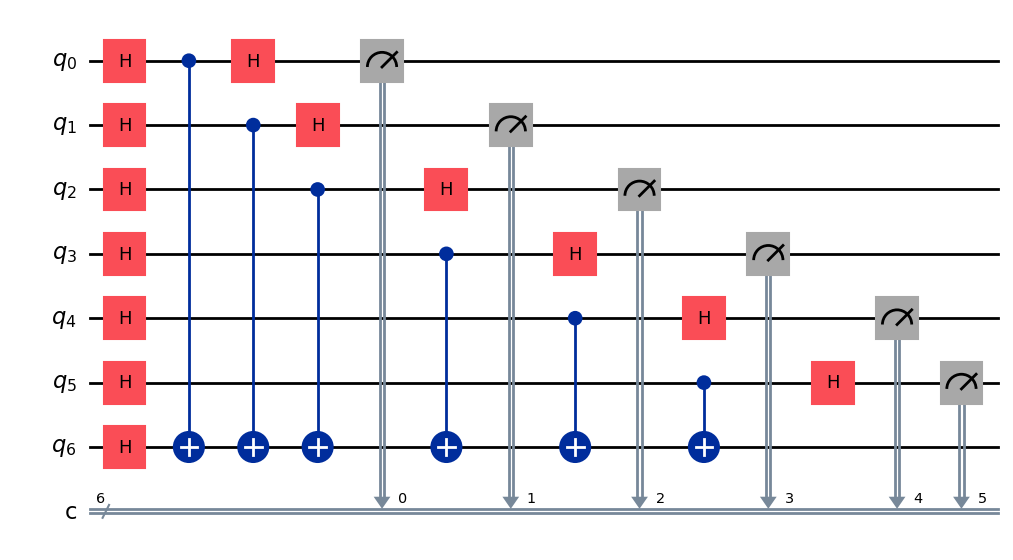

In [2]:
n = 6
dj_circuit = QuantumCircuit(n+1, n)

for qubit in range(n+1):
    dj_circuit.h(qubit)

for qubit in range(n):
    dj_circuit.cx(qubit, n)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.measure(range(n), range(n))
dj_circuit.draw('mpl')

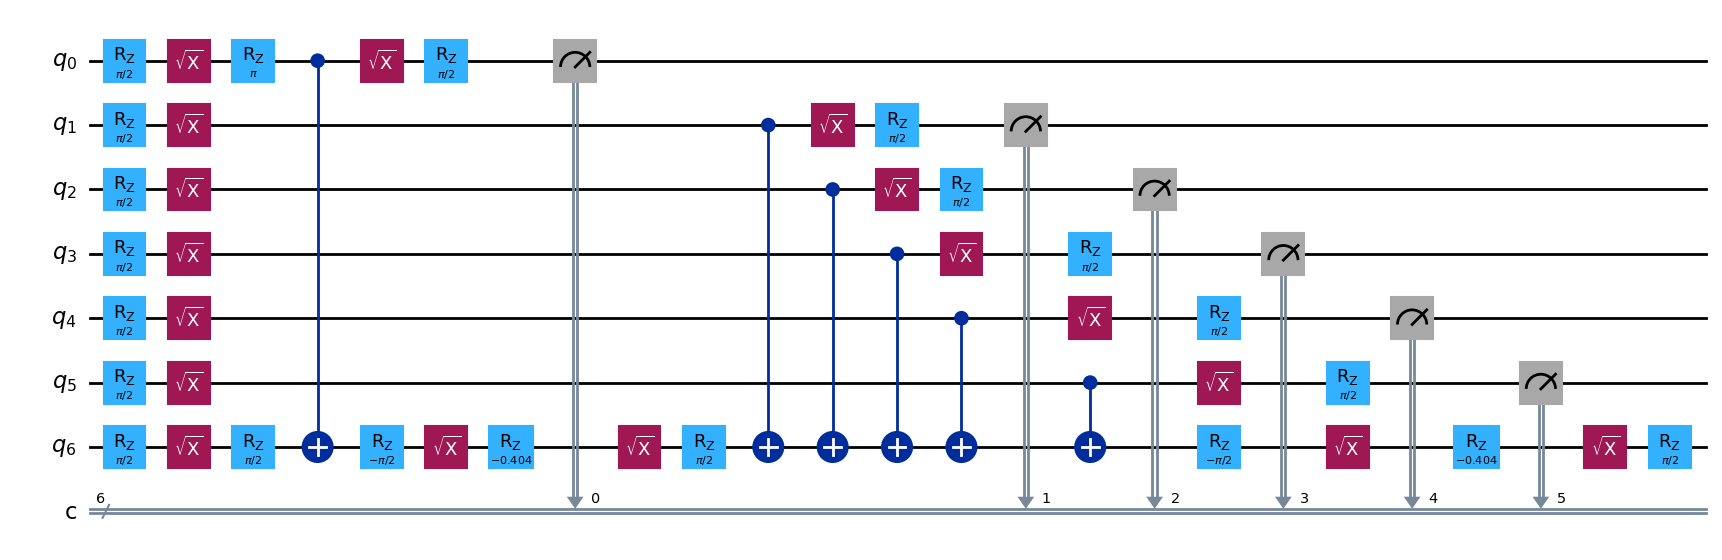

In [3]:
# Transpile the circuit for ideal simulation
simulator = AerSimulator()

pm = generate_preset_pass_manager(optimization_level=3, basis_gates=['x','sx','rz','cx','id'])
transpiled_circuit = pm.run(dj_circuit)

transpiled_circuit.draw('mpl', fold=-1)

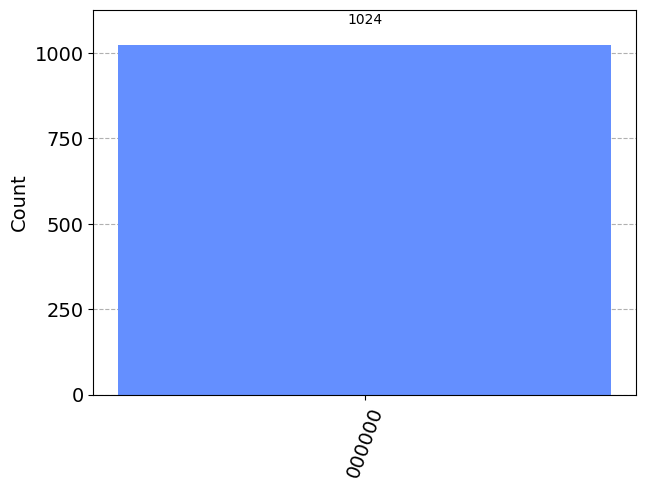

In [4]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
sampler = SamplerV2(backend=sim_ideal)
result_ideal = sim_ideal.run(transpiled_circuit).result()
plot_histogram(result_ideal.get_counts(0))

## NOISY SIMULATION

In [5]:
p_error = 0.1
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])
error_de = depolarizing_error(0.01, 2)
print(bit_flip)
print(phase_flip)
print(error_de)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.1, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(1) = 0.9, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.1, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
  P(1) = 0.9, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.990625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.000625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.000625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.000625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.000625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.00062

In [6]:
noise_model_dj = NoiseModel()
noise_model_dj.add_all_qubit_quantum_error(bit_flip, "bit_flip")
noise_model_dj.add_all_qubit_quantum_error(phase_flip, "phase_flip")
noise_model_dj.add_all_qubit_quantum_error(error_de, ['cx','ecr'])

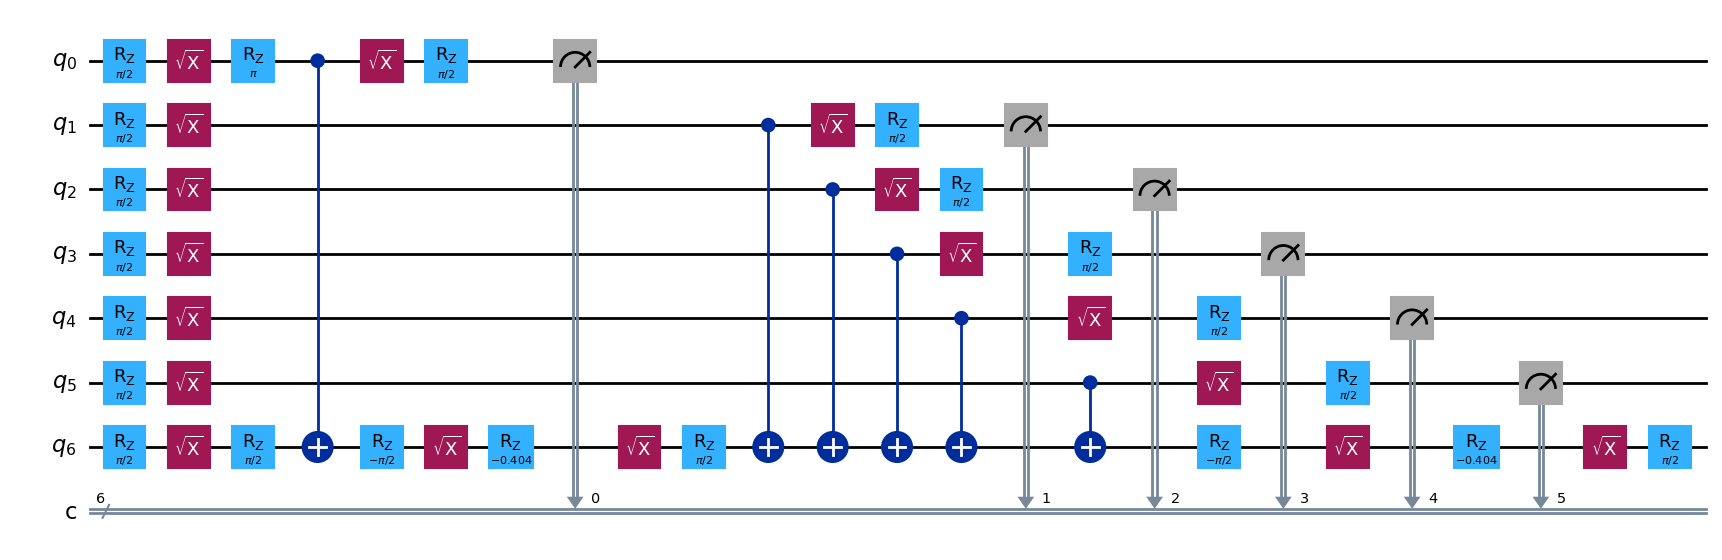

In [7]:
# Transpile the circuit for the noisy simulation
simulator = AerSimulator(noise_model=noise_model_dj)

pm = generate_preset_pass_manager(optimization_level=3, basis_gates=['x','sx','rz','cx','id'])
transpiled_circuit = pm.run(dj_circuit)

transpiled_circuit.draw('mpl', fold=-1)

In [8]:
# Simulate the circuit with noise
result = simulator.run(transpiled_circuit, noise_model=noise_model_dj).result()
counts = result.get_counts()

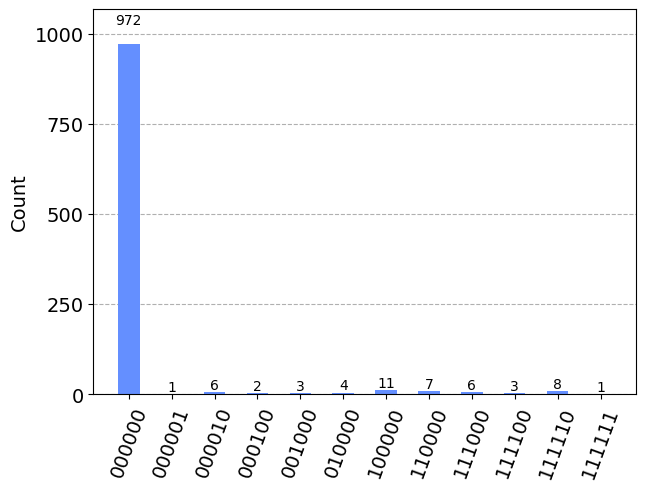

In [9]:
# Plot the results
plot_histogram(counts)

<br>

# BERNSTEIN-VAZIRANI CIRCUIT

### IDEAL SIMULATION

Enter string of 6-bits:  100111


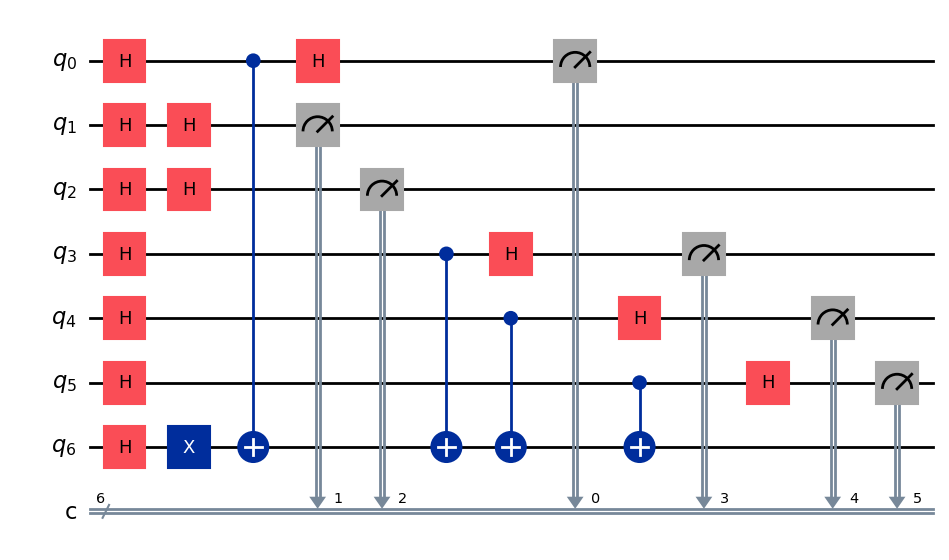

In [10]:
s=input("Enter string of 6-bits: ")

bv_circuit = QuantumCircuit(n+1, n)
bv_circuit.h(n)
bv_circuit.x(n)
for i in range(n):
    bv_circuit.h(i)

for i in range(len(s)):
    if (s[i]=='1'):
        bv_circuit.cx(i,n)

for i in range(len(s)):
    bv_circuit.h(i)

bv_circuit.measure(range(n), range(n))
bv_circuit.draw('mpl')

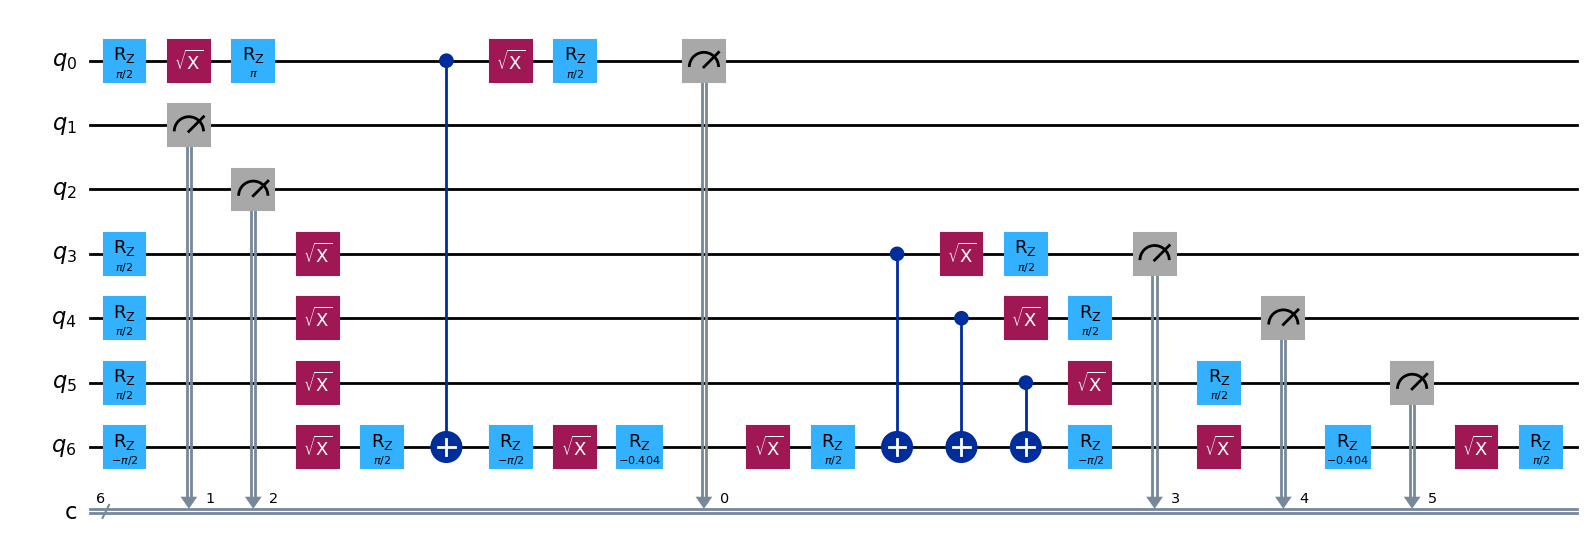

In [11]:
# Transpile the circuit for ideal simulation
simulator = AerSimulator()

pm = generate_preset_pass_manager(optimization_level=3, basis_gates=['x','sx','rz','cx','id'])
transpiled_circuit = pm.run(bv_circuit)

transpiled_circuit.draw('mpl', fold=-1)

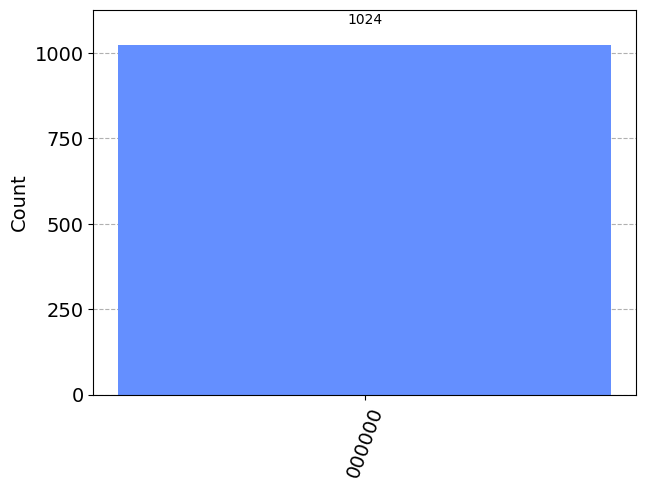

In [12]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(transpiled_circuit).result()
plot_histogram(result_ideal.get_counts(0))

### NOISY SIMULATION

In [13]:
p_error = 0.05
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])
error_de = depolarizing_error(0.01, 2)

In [14]:
noise_model_bv = NoiseModel()
noise_model_bv.add_all_qubit_quantum_error(bit_flip, "bit_flip")
noise_model_bv.add_all_qubit_quantum_error(phase_flip, "phase_flip")
noise_model_bv.add_all_qubit_quantum_error(error_de, ['cx','ecr'])

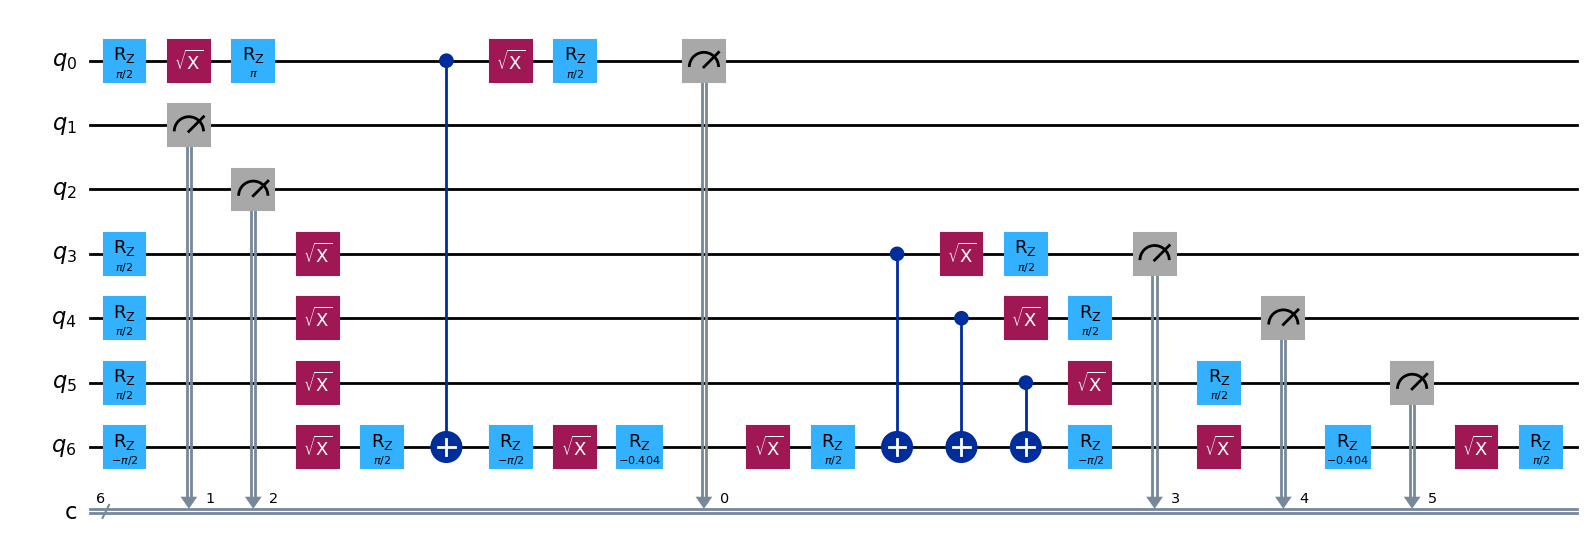

In [15]:
# Transpile the circuit for the noisy simulation
simulator = AerSimulator(noise_model=noise_model_bv)

pm = generate_preset_pass_manager(optimization_level=3, basis_gates=['x','sx','rz','cx','id'])
transpiled_circuit = pm.run(bv_circuit)

transpiled_circuit.draw('mpl', fold=-1)

In [17]:
# Simulate the circuit with noise
result = simulator.run(transpiled_circuit, noise_model=noise_model_bv).result()
counts = result.get_counts()

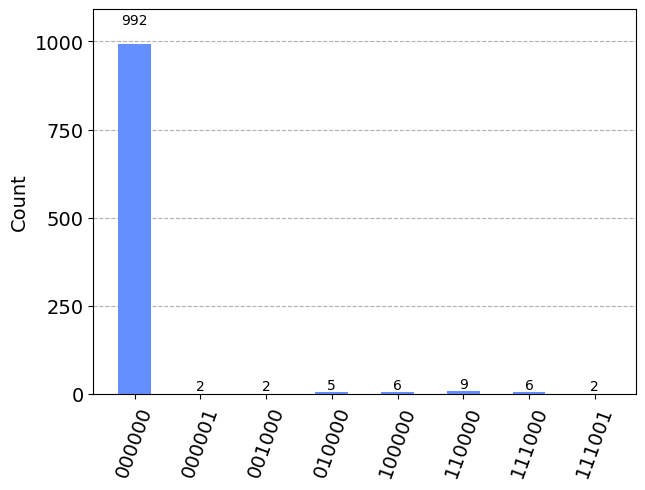

In [18]:
# Plot the results
plot_histogram(counts)

## BACKEND

In [23]:
from qiskit_ibm_runtime import QiskitRuntimeService
MY_TOKEN = '5d00a533cc46cc02eca65a5aa42cf20809da6d1d4cf9120d40131979ea9daaca37d51499493382e5b5ee5c56bae06bcc4b2c31b3e52e17f4abd3f7e7ac1412cd'
service = QiskitRuntimeService(channel='ibm_quantum', instance='ibm-q/open/main', token=MY_TOKEN)

In [24]:
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]


In [25]:
service.backends() # list of all backend
backend = service.get_backend('ibm_sherbrooke') # see the least busy and use that

In [26]:
sampler = SamplerV2(backend=backend)
sampler.options.dynamical_decoupling.enable = False
#sampler.options.twirling.enable_gates = False
#sampler.options.twirling.enable_measure = False

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
trans_dj_circuit = pm.run(dj_circuit)

In [27]:
job = sampler.run([trans_dj_circuit])
job_id = job.job_id()

In [28]:
print(job_id)

ct5s9j68t340008y24d0


In [35]:
job_result = job.result()

# To get counts for a particular pub result, use 
#
#pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register. 
# You can use circuit.cregs to find the name of the classical registers.

In [31]:
print(job_result)

PrimitiveResult([PubResult(data=DataBin<>(c=BitArray(<shape=(), num_shots=4096, num_bits=6>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


In [34]:
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]


In [36]:
backend = service.get_backend('ibm_osaka')

In [37]:
sampler = SamplerV2(backend=backend)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
trans_dj_circuit = pm.run(bv_circuit)

In [38]:
job = sampler.run([trans_dj_circuit])
job_id = job.job_id()

In [39]:
job_id

'ct5ts2w7srd000891ksg'

In [40]:
job_result = job.result()

KeyboardInterrupt: 

In [ ]:
print(job_result)

base_runtime_job._start_websocket_client:WARNING:2024-07-08 14:42:36,504: An error occurred while streaming results from the server for job ct5ts2w7srd000891ksg:
Traceback (most recent call last):
  File "/home/poulami/anaconda3/envs/quantum/lib/python3.12/site-packages/qiskit_ibm_runtime/base_runtime_job.py", line 311, in _start_websocket_client
    self._ws_client.job_results()
  File "/home/poulami/anaconda3/envs/quantum/lib/python3.12/site-packages/qiskit_ibm_runtime/api/clients/runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "/home/poulami/anaconda3/envs/quantum/lib/python3.12/site-packages/qiskit_ibm_runtime/api/clients/base_websocket_client.py", line 222, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'

